In [3]:
"""
seaborn系列 (3) | 折线图lineplot() 原创
脑机接口社区2021-09-07 11:40:20博主文章分类：数据分析与可视化

折线图
注意：数据一定是通过DataFrame中传送的

函数原型
seaborn.lineplot(x=None, y=None, hue=None, 
                 size=None, style=None, data=None,
                 palette=None, hue_order=None, hue_norm=None, 
                 sizes=None, size_order=None, size_norm=None, 
                 dashes=True, markers=None, style_order=None, 
                 units=None, estimator='mean', ci=95, n_boot=1000,
                 sort=True, err_style='band', err_kws=None,
                 legend='brief', ax=None, **kwargs)

参数解读
data:是DataFrame类型的;

可选：下面均为可选

x,y：数据中变量的名称;

hue:数据中变量名称(比如：二维数据中的列名)
作用：对将要生成不同颜色的线进行分组，可以是分类或数据。

size:数据中变量名称(比如：二维数据中的列名)
作用：对将要生成不同宽度的线进行分组，可以是分类或数据。

style:数据中变量名称(比如：二维数据中的列名)
作用：对将生成具有不同破折号、或其他标记的变量进行分组。

palette:调试板名称，列表或字典类型
作用：设置hue指定的变量的不同级别颜色。

hue_order:列表(list)类型
作用：指定hue变量出现的指定顺序，否则他们是根据数据确定的。

hue_norm:tuple或Normalize对象

sizes:list dict或tuple类型
作用：设置线宽度，当其为数字时，它也可以是一个元组，指定要使用的最大和最小值，会自动在该范围内对其他值进行规范化。

units:对变量识别抽样单位进行分组，使用时，将为每个单元绘制一个单独的行。

estimator:pandas方法的名称或回调函数或者None
作用：用于在同一x水平上聚合y变量的多个观察值的方法，如果为None，则将绘制所有观察结果。
-----------------------------------
©著作权归作者所有：来自51CTO博客作者脑机接口社区的原创作品，请联系作者获取转载授权，否则将追究法律责任
seaborn系列 (3) | 折线图lineplot()
https://blog.51cto.com/u_6811786/3790248
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
%matplotlib inline

from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings("ignore")

def fun(x):
    if x >0:
        return 1
    else:
        return 0
# sklearn自带数据 diabetes 糖尿病数据集
diabetes=load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#只抽取前80个数据
df=data[:80]
#由于diabetes中的数据均已归一化处理过，sex列中的值也归一化，现将其划分一下，大于0的设置为1，小于等于0的设置为0
df['sex']=df['sex'].apply(lambda x: fun(x))
#展示前5条数据
df[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


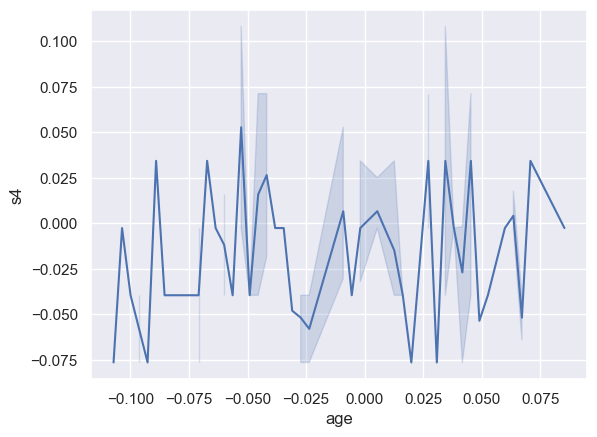

In [4]:
"""
案例1：绘制带有误差带的单线图，显示置信区间
"""
ax = sns.lineplot(x="age", y="s4",data=df)
plt.show()

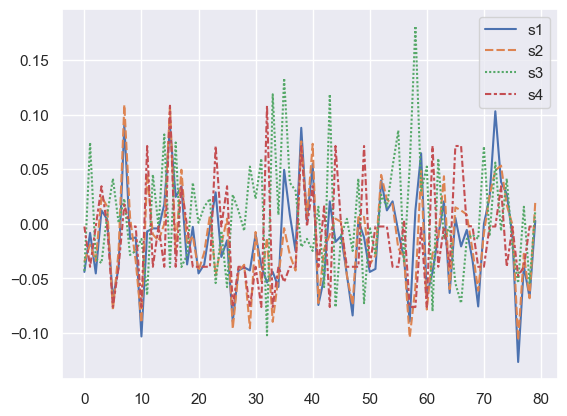

In [5]:
"""
案例2：绘制带有误差带的单线图，显示置信区间
"""
dd=[df['s1'],df['s2'],df['s3'],df['s4']]
ax = sns.lineplot(data=dd)
plt.show()

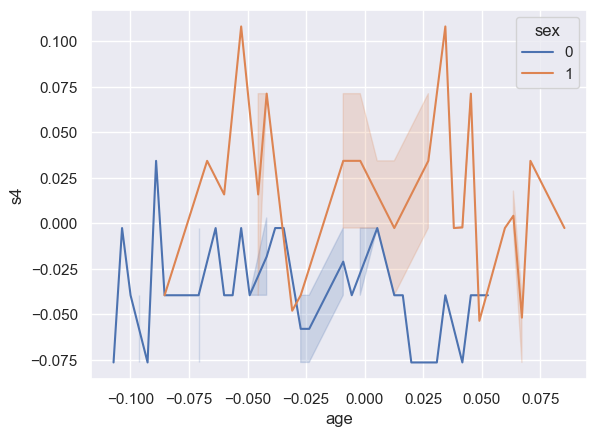

In [6]:
"""
案例3：设置hue为sex,按照sex分组，并显示不同颜色
"""
sns.lineplot(x="age", y="s4", hue="sex",data=df)
plt.show()

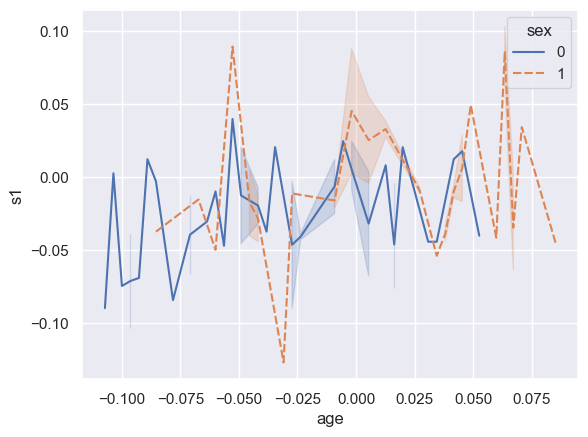

In [7]:
"""
案例4:使用颜色和线型显示分组变量
"""
sns.lineplot(x="age", y="s1",hue="sex", style="sex", data=df)
plt.show()

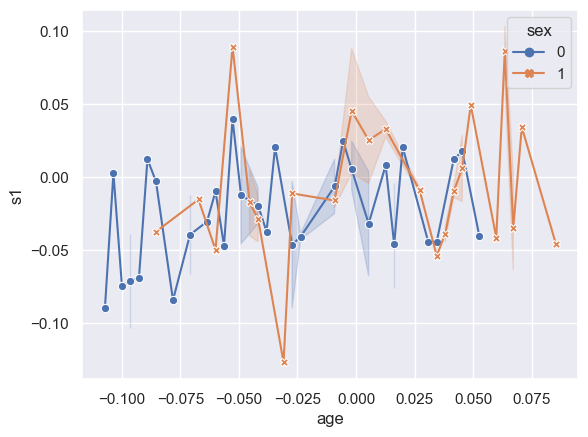

In [8]:
"""
案例5：使用标记来标识组，而不用破折号来标识组：设置markers为True,设置dashes为False
"""
sns.lineplot(x="age", y="s1",hue="sex", style="sex", markers=True, dashes=False, data=df)
plt.show()

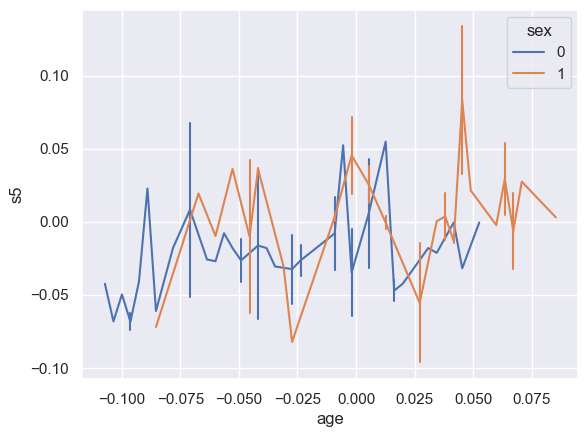

In [9]:
"""
案例6：显示错误条，而不显示错误带
"""
sns.lineplot(x="age", y="s5",hue="sex",err_style="bars", ci=68, data=df)
plt.show()

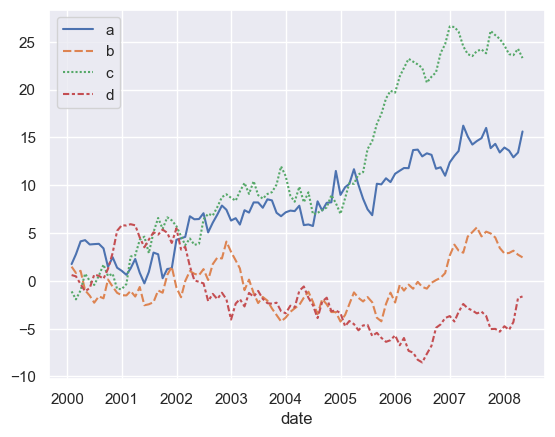

In [11]:
"""
案例7：绘制时间序列数据
"""
# 构建 时间序列数据 从2000-1-31开始，以月份为间隔，构建100条记录
index = pd.date_range("1 1 2000", periods=100,freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)

# 构建5列数据，列名分别为data a b c d
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])

sns.lineplot(data=wide_df)
plt.show()